## Vector-valued function with Random Fourier Features

### Imports

In [98]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import time
from functools import wraps

### Runtime

In [99]:
def runtime(func):
    @wraps(func)
    def runtime_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print("\n", f'Function {func.__name__} took {total_time:.4f} seconds')
        return result
    return runtime_wrapper

### Values

In [100]:
dimension = 2
sigma = 10
sigma2 = 2*sigma**2

# Random Fourier features
m = 20 # number of samples
w = np.array([randn(m) / sigma, randn(m) / sigma]) # w is the same size as the dimensions times the number of samples
b = np.random.rand(1, m)*2*np.pi # b is the same size as number of samples
n = 500 # number of points

x1 = randn(n)/2
x2 =  randn(n)/2
x_vector = np.array([x1, x2])
# x_vector = np.block([x1,x2])


noise = randn(n) * 1e-1
#y1 = np.cos(x1) + noise
#y2 = np.sin(x2) + noise

y1 = 1+np.sin(x1/10) + x1**2 + noise
y2 = 0.5 * x2**2 + np.exp(x2) + noise

y = np.array(np.ravel([y1, y2], 'F'))

lam = 0.000001 # Regularization parameter


(1000,)

### Gaussian Kernel

In [101]:
def k_gauss(x, z):
    k = np.exp(-((np.linalg.norm(x-z))**2)/(2*sigma**2))
    return k

def k_matrix(x, z, dim):
    k = k_gauss(x, z)
    k_matrix = k *np.eye(dim)
    return k_matrix

@runtime
def K_gauss(x, n, dim):
    K = np.zeros((dim*n, dim*n))
    for i in range(0, n):
        for j in range(0, n):
            k = k_gauss(x[:,i], x[:,j])
            K[i*dim][j*dim] = k
            K[i*dim+1][j*dim+1] = k
    return K

K = K_gauss(x_vector, n, dimension)



 Function K_gauss took 1.5284 seconds


#### Alpha

In [102]:
# Returns a vector with length dim * n
@runtime
def alpha(x, y, lam, n, dim):
    K = K_gauss(x, n, dim)
    alpha_vector = np.linalg.inv((K + lam*np.eye(dim*n))) @ y
    alpha_reshape = [alpha_vector[::2], alpha_vector[1::2]]
    return np.array(alpha_reshape)

alpha_ = alpha(x_vector, y, lam, n, dimension)



 Function K_gauss took 1.6770 seconds

 Function alpha took 1.8295 seconds


#### Estimated function

In [103]:
@runtime
def estimated_function(alpha, x, n, dim):
    function = np.zeros((2, n))
    for i in range(n):
        sum = np.zeros((2))
        x_i = x[:, i]
        for j in range(n):
            k = k_gauss(x_i, x[:, j])
            print(x[:,j])
            kernel = k*np.eye(dim)
            sum = sum + kernel@alpha[:, j]
        function[:, i] = sum 
    return function

func = estimated_function(alpha_, x_vector, n, dimension)

[-0.13258092  0.27240239]
[ 0.35948655 -0.42945992]
[-0.59456559 -0.65693861]
[ 0.12120065 -0.06115575]
[0.06893098 0.62510744]
[0.60851994 0.16844083]
[ 0.29884799 -0.39832621]
[ 0.09971196 -0.40002003]
[0.34790932 0.60705516]
[-0.10602266 -0.44746823]
[-0.24094073  1.08575794]
[0.52072693 0.72434297]
[-0.92360099 -0.36230293]
[ 0.3919979  -0.40391691]
[-0.69062712 -0.11471435]
[0.38241093 0.29542323]
[ 0.98130814 -0.60012422]
[-0.46044799  0.24670058]
[0.40100778 0.2096634 ]
[0.55136353 0.27206525]
[-0.22685012  0.2839962 ]
[0.73203252 0.09588799]
[-0.14416834 -0.5412546 ]
[-0.11698795 -0.53334419]
[-0.32907825  0.60551679]
[ 0.24095731 -0.449061  ]
[ 0.58111356 -0.02702378]
[-0.10059205 -0.20253083]
[-0.14733589  0.30439572]
[-0.00307138 -0.20136269]
[-0.74879523 -0.43794103]
[ 0.08134487 -0.70499056]
[-0.81243332  0.13603901]
[-0.08300336  0.15312869]
[-0.4710311   0.56406311]
[0.64393127 0.20200507]
[0.62644914 0.50787373]
[ 0.09240968 -0.59103221]
[-0.25320951  0.57787727]
[0.365

array([[1.00392217, 1.15363227, 1.28087617, 1.01885341, 1.00765561,
        1.42118174, 1.10743789, 1.00786591, 1.14612963, 0.98888952,
        1.0320003 , 1.30926721, 1.75955038, 1.18177654, 1.41226605,
        1.17540137, 2.06631194, 1.17244017, 1.19171555, 1.34876179,
        1.03054808, 1.59997619, 0.99287345, 0.98849708, 1.08061214,
        1.06962585, 1.38663501, 0.99289427, 1.00714463, 0.99133445,
        1.4815223 , 0.99787453, 1.58912287, 0.99607003, 1.18294016,
        1.46883521, 1.44217094, 1.00281984, 1.04236605, 1.16126289,
        0.97852062, 1.0622767 , 1.03267337, 1.02827025, 1.57335713,
        1.19049899, 1.03464401, 0.99834061, 1.03779301, 1.40549355,
        1.20263054, 1.15282208, 1.18488506, 1.51804522, 0.99485164,
        1.16806344, 1.20656678, 1.00144598, 1.13885674, 1.79654854,
        1.08728135, 1.45580579, 1.00198725, 1.17120832, 1.0172448 ,
        1.05648961, 1.32566009, 1.16382501, 1.00797379, 1.16515811,
        1.82380706, 1.11956849, 1.29246505, 1.15

#### Plot

C:\Users\Heli\AppData\Local\Temp\ipykernel_10952\4258807897.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\Heli\AppData\Local\Temp\ipykernel_10952\4258807897.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


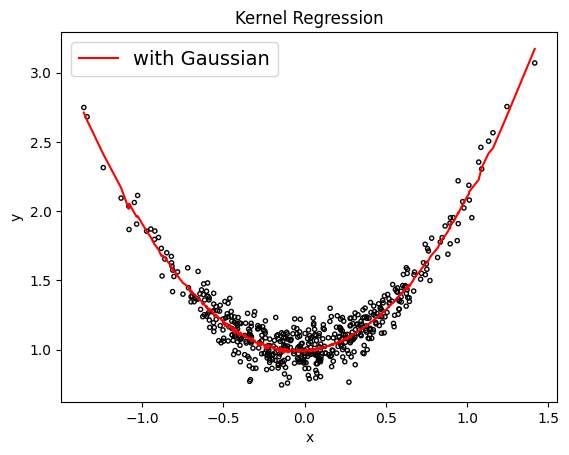

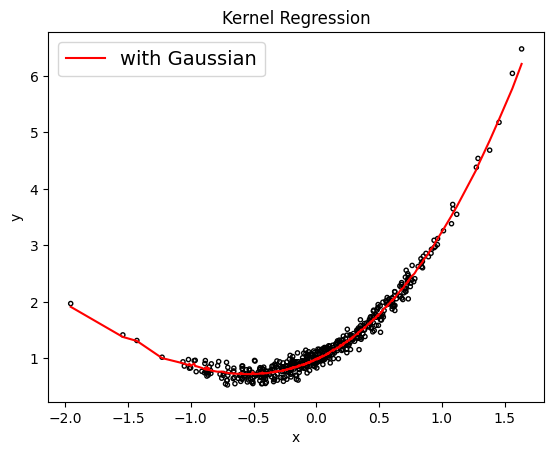

In [113]:
plt.style.use('default')

# Plot for x1 and y1
f1_sort = np.array([x for _,x in sorted(zip(x1,func[0]))])

f = plt.figure(1)
plt.scatter(x1,y1, facecolors ='none' , edgecolors = "k" , marker = ".")
plt.plot(np.sort(x1), f1_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
f.show()

# Plot for x2 and y2
f2_sort = np.array([x for _,x in sorted(zip(x2,func[1]))])

g = plt.figure(2)
plt.scatter(x2,y2, facecolors ='none' , edgecolors = "k" , marker = ".")
plt.plot(np.sort(x2), f2_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
g.show()

### With Random Fourier Features

#### Psi

In [105]:
"""
def psi(x, w, b):
    return np.sqrt(2) * np.cos(w.T@x + b)

def psi_vector(x, w, b, m):
    psi_vector = np.zeros(m)
    for i in range(m):
        # b should be a scalar, now it is a vector
        psi_vector[i] = psi(x, w[:, i], b[i])
    return np.array(psi_vector)

def capital_psi(x, w, b, m, dim):
    psi = psi_vector(x,w,b,m)
    return np.kron(psi, np.eye(dim))
"""
def psi(x, w, b):
    return np.sqrt(2) * np.cos(w.T@x + b)

def psi_vector(x, w, b, m):
    psi_vector = np.zeros(m)
    for i in range(m):
        psi_vector[i] = psi(x, w[:, i], b[:,i])
    return np.array(psi_vector)

def capital_psi(x, w, b, m, dim):
    psi = psi_vector(x,w,b,m)
    return np.kron(psi, np.eye(dim))



#### Phi

In [106]:
def phi(x, w, b, n, m, dim):
    phi = np.zeros((dim*n, dim*m))
    for i in range(0, n):
        psi = capital_psi(x[:,i], w, b, m, dim)
        phi[dim*i] = psi[0]
        phi[dim*i+1] = psi[1]
    return phi

phi_ = phi(x_vector, w, b, n, m, dimension)

#### Alpha

In [107]:
"""
def alpha_approx(x_vector, y, dim, m, lam, n):
    phi_ = phi(x_vector, w, b, n, m, dimension)
    print(phi_.T@y)
    alpha = np.linalg.inv(phi_.T @ phi_ + lam*np.eye(dim*m)) @ (phi_.T@y)

    return alpha
"""
def alpha_approx(x_vector, y, dim, m, lam, n):
    phi_ = phi(x_vector, w, b, n, m, dim)
    alpha_inv_part = np.linalg.inv(phi_.T @ phi_ + lam*np.eye(dim*m))
    y_reshaped = np.reshape(y, (-1,1))
    alpha = alpha_inv_part @ (phi_.T @ y_reshaped)
    return alpha

alpha_approximation = alpha_approx(x_vector, y, dimension, m, lam, n)
alpha_approximation.shape

(40, 1)

#### Function Approximation

In [108]:
@runtime
def function_approximation(alpha, x, n, dim):
    f = np.zeros((dim, n))
    for i in range(n):
        f[:, [i]] = capital_psi(x[:, i], w, b, m, dim) @ alpha
    return f

# Evt: Gir samme resultat
def func_2(alpha, phi):
    func = phi @ alpha
    return np.array([func[::2], func[1::2]])

function_estimate = function_approximation(alpha_approximation, x_vector, n, dimension)



 Function function_approximation took 0.1058 seconds


#### Plot

C:\Users\Heli\AppData\Local\Temp\ipykernel_10952\268464187.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\Heli\AppData\Local\Temp\ipykernel_10952\268464187.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


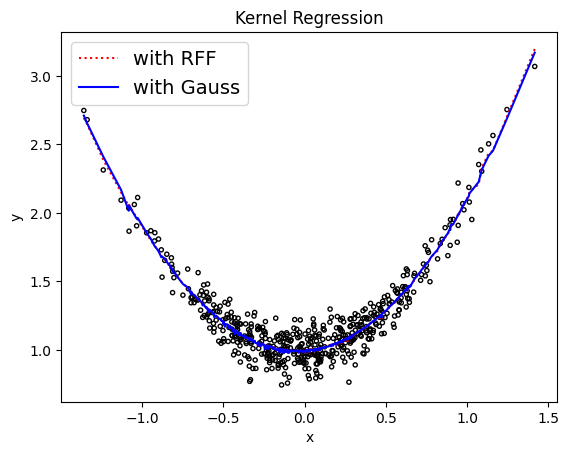

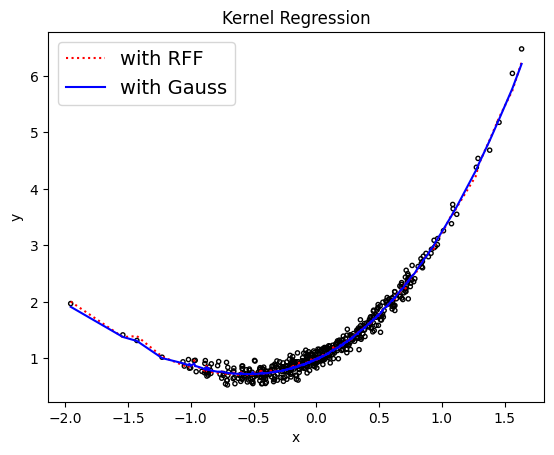

In [111]:
# Plot for x1 and y1
f1_sort_approx = np.array([x for _,x in sorted(zip(x1,function_estimate[0]))])

f = plt.figure(1)
plt.style.use('default')
plt.scatter(x1,y1, facecolors ='none' , edgecolors = "k" , marker = ".")
plt.plot(np.sort(x1), f1_sort_approx, c="r", label="with RFF", ls = ":")
plt.plot(np.sort(x1), f1_sort, c="b", label="with Gauss")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
f.show()

# Plot for x2 and y2
f2_sort_approx = np.array([x for _,x in sorted(zip(x2,function_estimate[1]))])

g = plt.figure(2)
plt.style.use('default')
plt.scatter(x2,y2, facecolors ='none' , edgecolors = "k" , marker = ".")
plt.plot(np.sort(x2), f2_sort_approx, c="r", label="with RFF", ls = ":")
plt.plot(np.sort(x2), f2_sort, c="b", label="with Gauss")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
g.show()